<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        MILK QUALITY PREDICTION                                                                
    </h2>
</div>


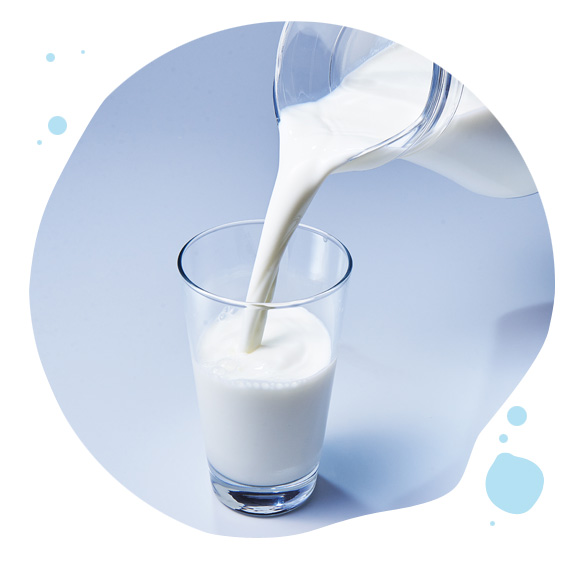

In this notebook, I will predict milk quality by seven observable milk variables.

We can classify milk into three groups: low quality, medium quality, and high quality.

The milk dataset contains 429 instances of low quality, 374 instances of medium quality, and 256 instances of high quality.

The central goal is to design a model that makes proper classifications for new milk samples. In other words, one which exhibits good generalization


<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        Importing the Dependencies
    </h2>
</div>

In [41]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        Read Data from csv
    </h2>
</div>

In [42]:
data = pd.read_csv('milknew.csv')

In [43]:
data.head(10)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
5,6.6,37,1,1,1,1,255,high
6,5.5,45,1,0,1,1,250,low
7,4.5,60,0,1,1,1,250,low
8,8.1,66,1,0,1,1,255,low
9,6.7,45,1,1,0,0,247,medium


# Dataset

This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of milk. This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.

pH: This feature defines pH of the milk, which is in the range of 3 to 9.5. temperature: This feature defines the temperature of the milk, and its range is from 34'C to 90'C.

taste: This feature defines the taste of the milk and takes the possibles values: 1 (good) or 0 (bad).

odor: This feature defines the odor of the milk and takes the possibles values: 1 (good) or 0 (bad).

fat: This feature defines fat of the milk and takes the possibles values: 1 (good) or 0 (bad).

turbidity: This feature defines the turbidity of the milk and takes the possibles values: 1 (good) or 0 (bad).

colour: This feature defines the color of the milk, which is in the range of 240 to 255.

grade: This is the target and takes the values: low_quality, medium_quality, or high_quality.

Table of content:
1. Importing the Dependencies.
2. Read Data from csv.
3. Take a Look at the Data Structure.
4. Data Visualization.
5. Data Preprocessing.
6. Training and Evaluating.


In [44]:
data.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        Take a Look at the Data Structure
    </h2>
</div>

In [45]:
data.shape

(1059, 8)

**Note:**Dataset contains 1059 rows and 8 columns

In [46]:
data.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


**All data is in float64  and int64 without Grade and that is an object**

In [48]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [49]:
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

**Note**:There are no null values so we do not need to handle it.

<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        Checking outlier and treating them
    </h2>
</div>

***BOX PLOT***

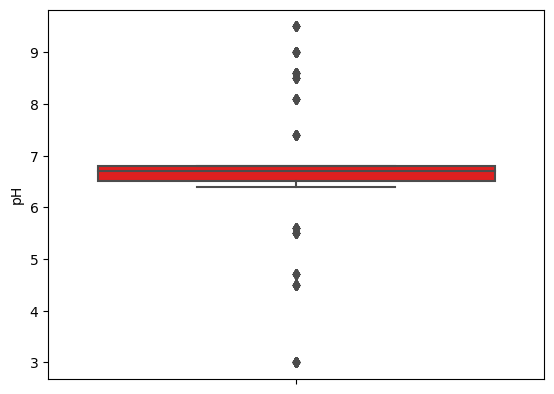

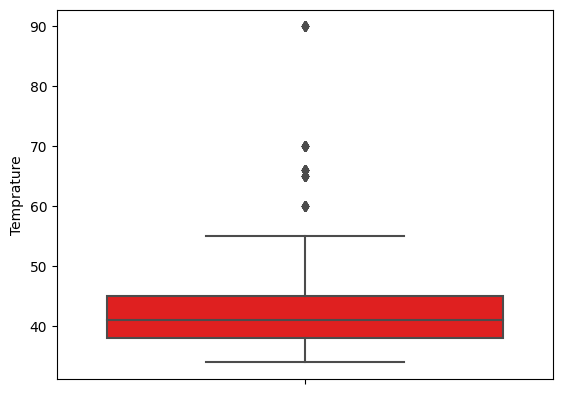

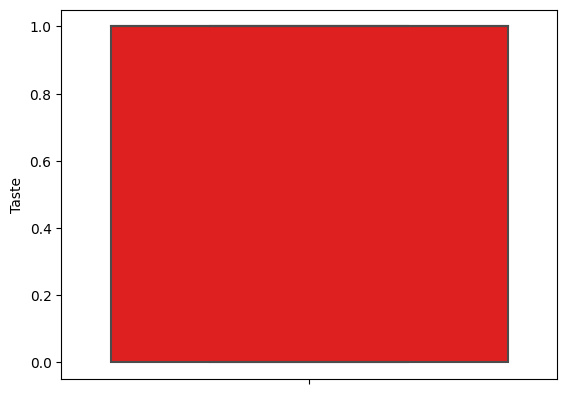

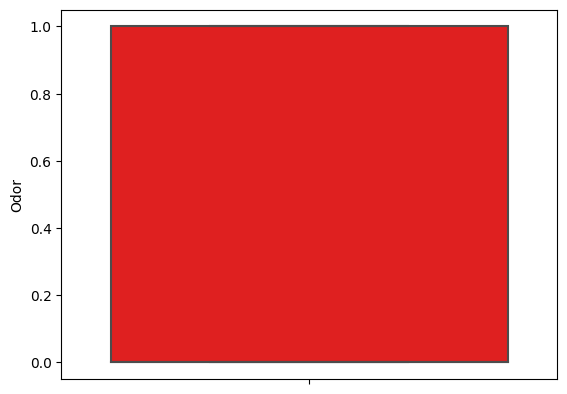

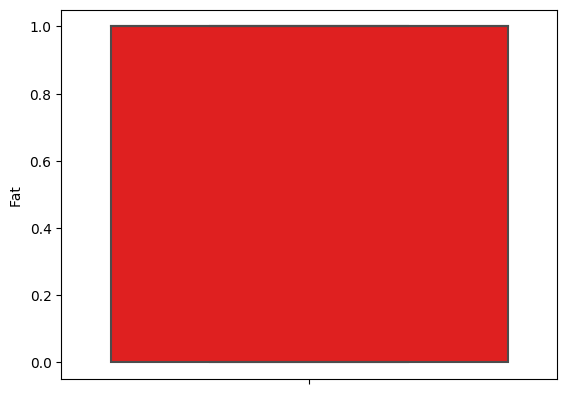

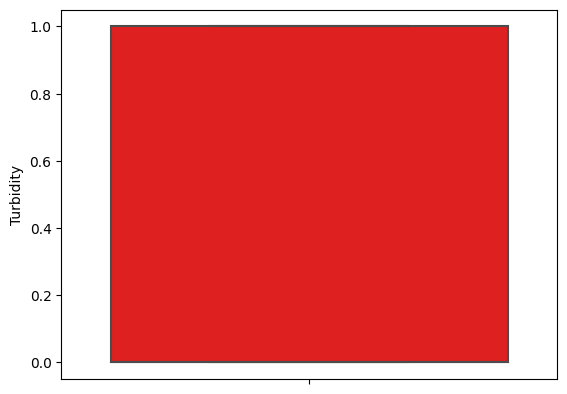

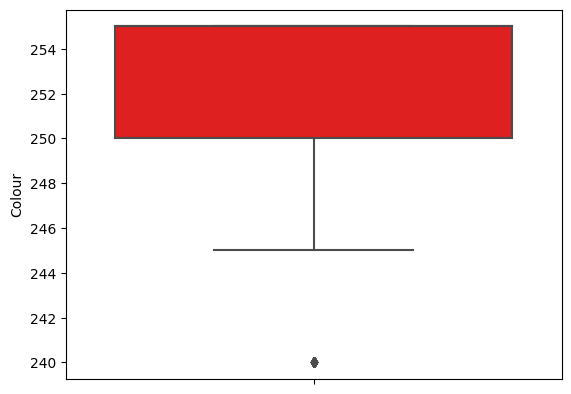

In [50]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.boxplot(y=data[i], color='red')
        plt.show()

***We found some outliers in PH and Temperature column***


**so the next step is to remove them**

# SETTING OUTLIER LIMITS:

In [51]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [52]:
for i in data.columns:
    if data[i].dtype != 'object':
        UL,LL = outlier_limit(data[i])
        data[i]=np.where((data[i]>UL)|(data[i]<LL),np.nan,data[i])

# LETS PLOT THE BARPLOT AGAIN TO SEE THE DIFFERENCE

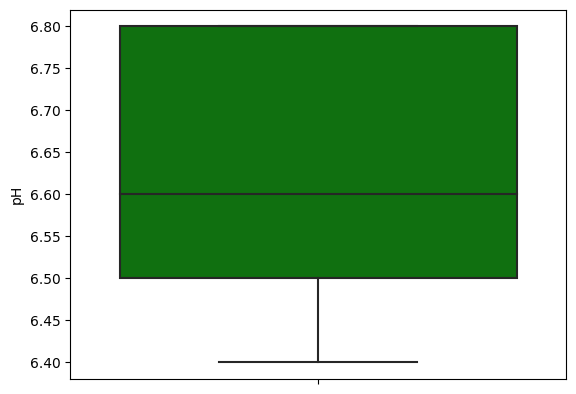

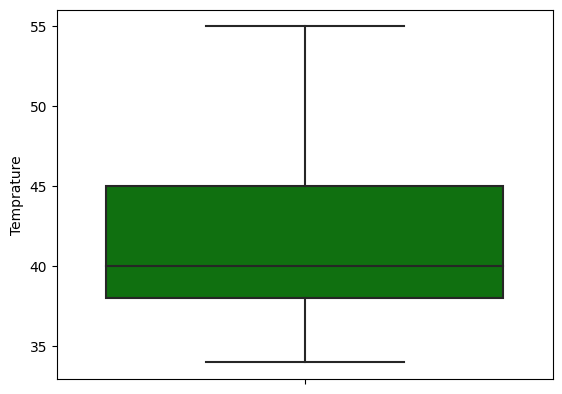

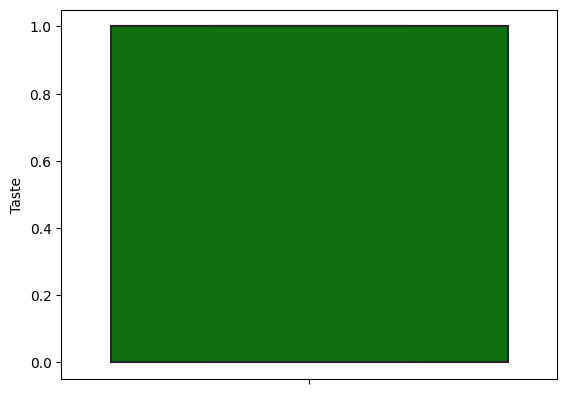

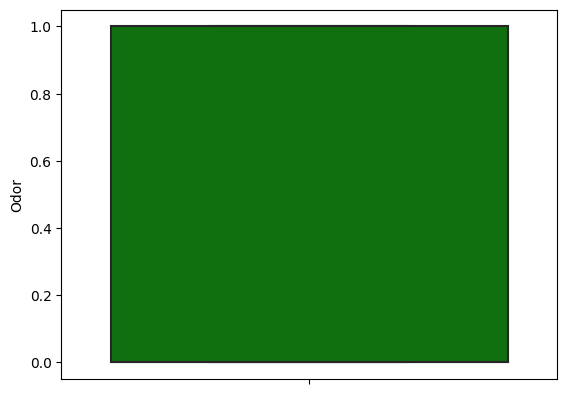

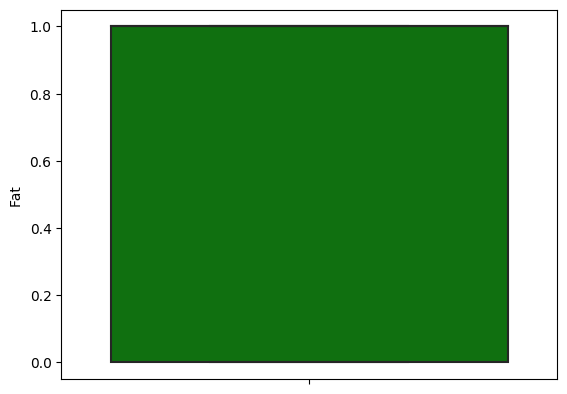

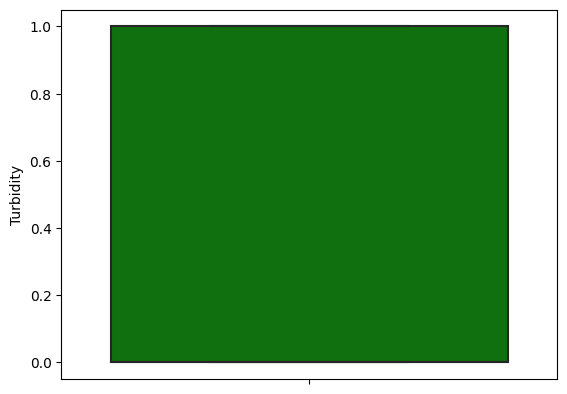

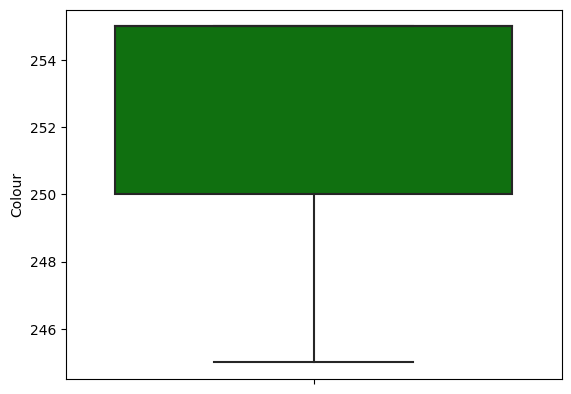

In [53]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.boxplot(y=data[i],color ="green")
        plt.show()

**Note**:**Here we can see all outliers are cleared**

**Let's check null values again because the outliers are changed to NaN after outlier treatment**

In [54]:
data.isnull().mean()*100

pH            35.788480
Temprature     9.726157
Taste          0.000000
Odor           0.000000
Fat            0.000000
Turbidity      0.000000
Colour         3.021719
Grade          0.000000
dtype: float64

<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        Data Preprocessing
    </h2>
</div>

In [55]:
Col_names=["Temprature","Colour","pH"]
for i in Col_names:
    meanv=data[i].mean()
    data[i].fillna(value=meanv,inplace=True)
data.isnull().sum()    

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [56]:
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

## Label Encoder
###  converting object data to numeric

In [57]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Grade']= label_encoder.fit_transform(data['Grade'])
data['Grade'].unique()

array([0, 1, 2])

**correlation between grade and other columns**

<AxesSubplot: >

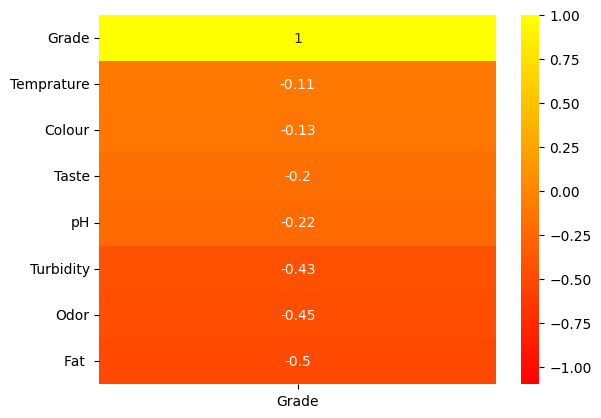

In [58]:
sns.heatmap(data.corr()[["Grade"]].sort_values(by="Grade",ascending=False),vmin=1,vmax=-1,annot=True,cmap="autumn")

In [59]:
X = data.drop(['Grade'],axis=1)
y = data['Grade']

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   float64
 2   Taste       1059 non-null   float64
 3   Odor        1059 non-null   float64
 4   Fat         1059 non-null   float64
 5   Turbidity   1059 non-null   float64
 6   Colour      1059 non-null   float64
 7   Grade       1059 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 62.2 KB


In [61]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

Whenever we train a machine learning model, we can’t train that model on a single dataset or even we train it on a single dataset then we will not be able to assess the performance of our model. For that reason, we split our source data into training and testing.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        Data Visualization
    </h2>
</div>

**pH vs Grade plot**

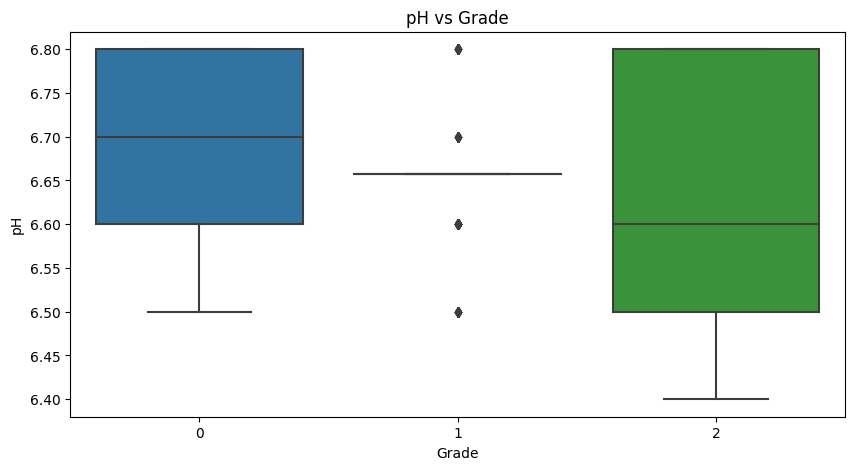

In [63]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x="Grade", y="pH")
plt.title('pH vs Grade')
plt.xlabel('Grade')
plt.ylabel('pH')
plt.show()

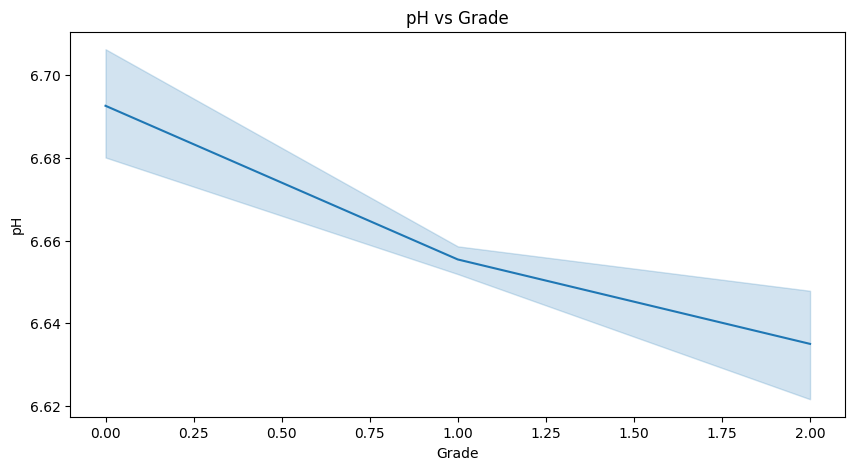

In [64]:

plt.figure(figsize=(10,5))
sns.lineplot(data=data, x="Grade", y="pH")
plt.title('pH vs Grade')
plt.xlabel('Grade')
plt.ylabel('pH')
plt.show()

**Pair plot of the data**

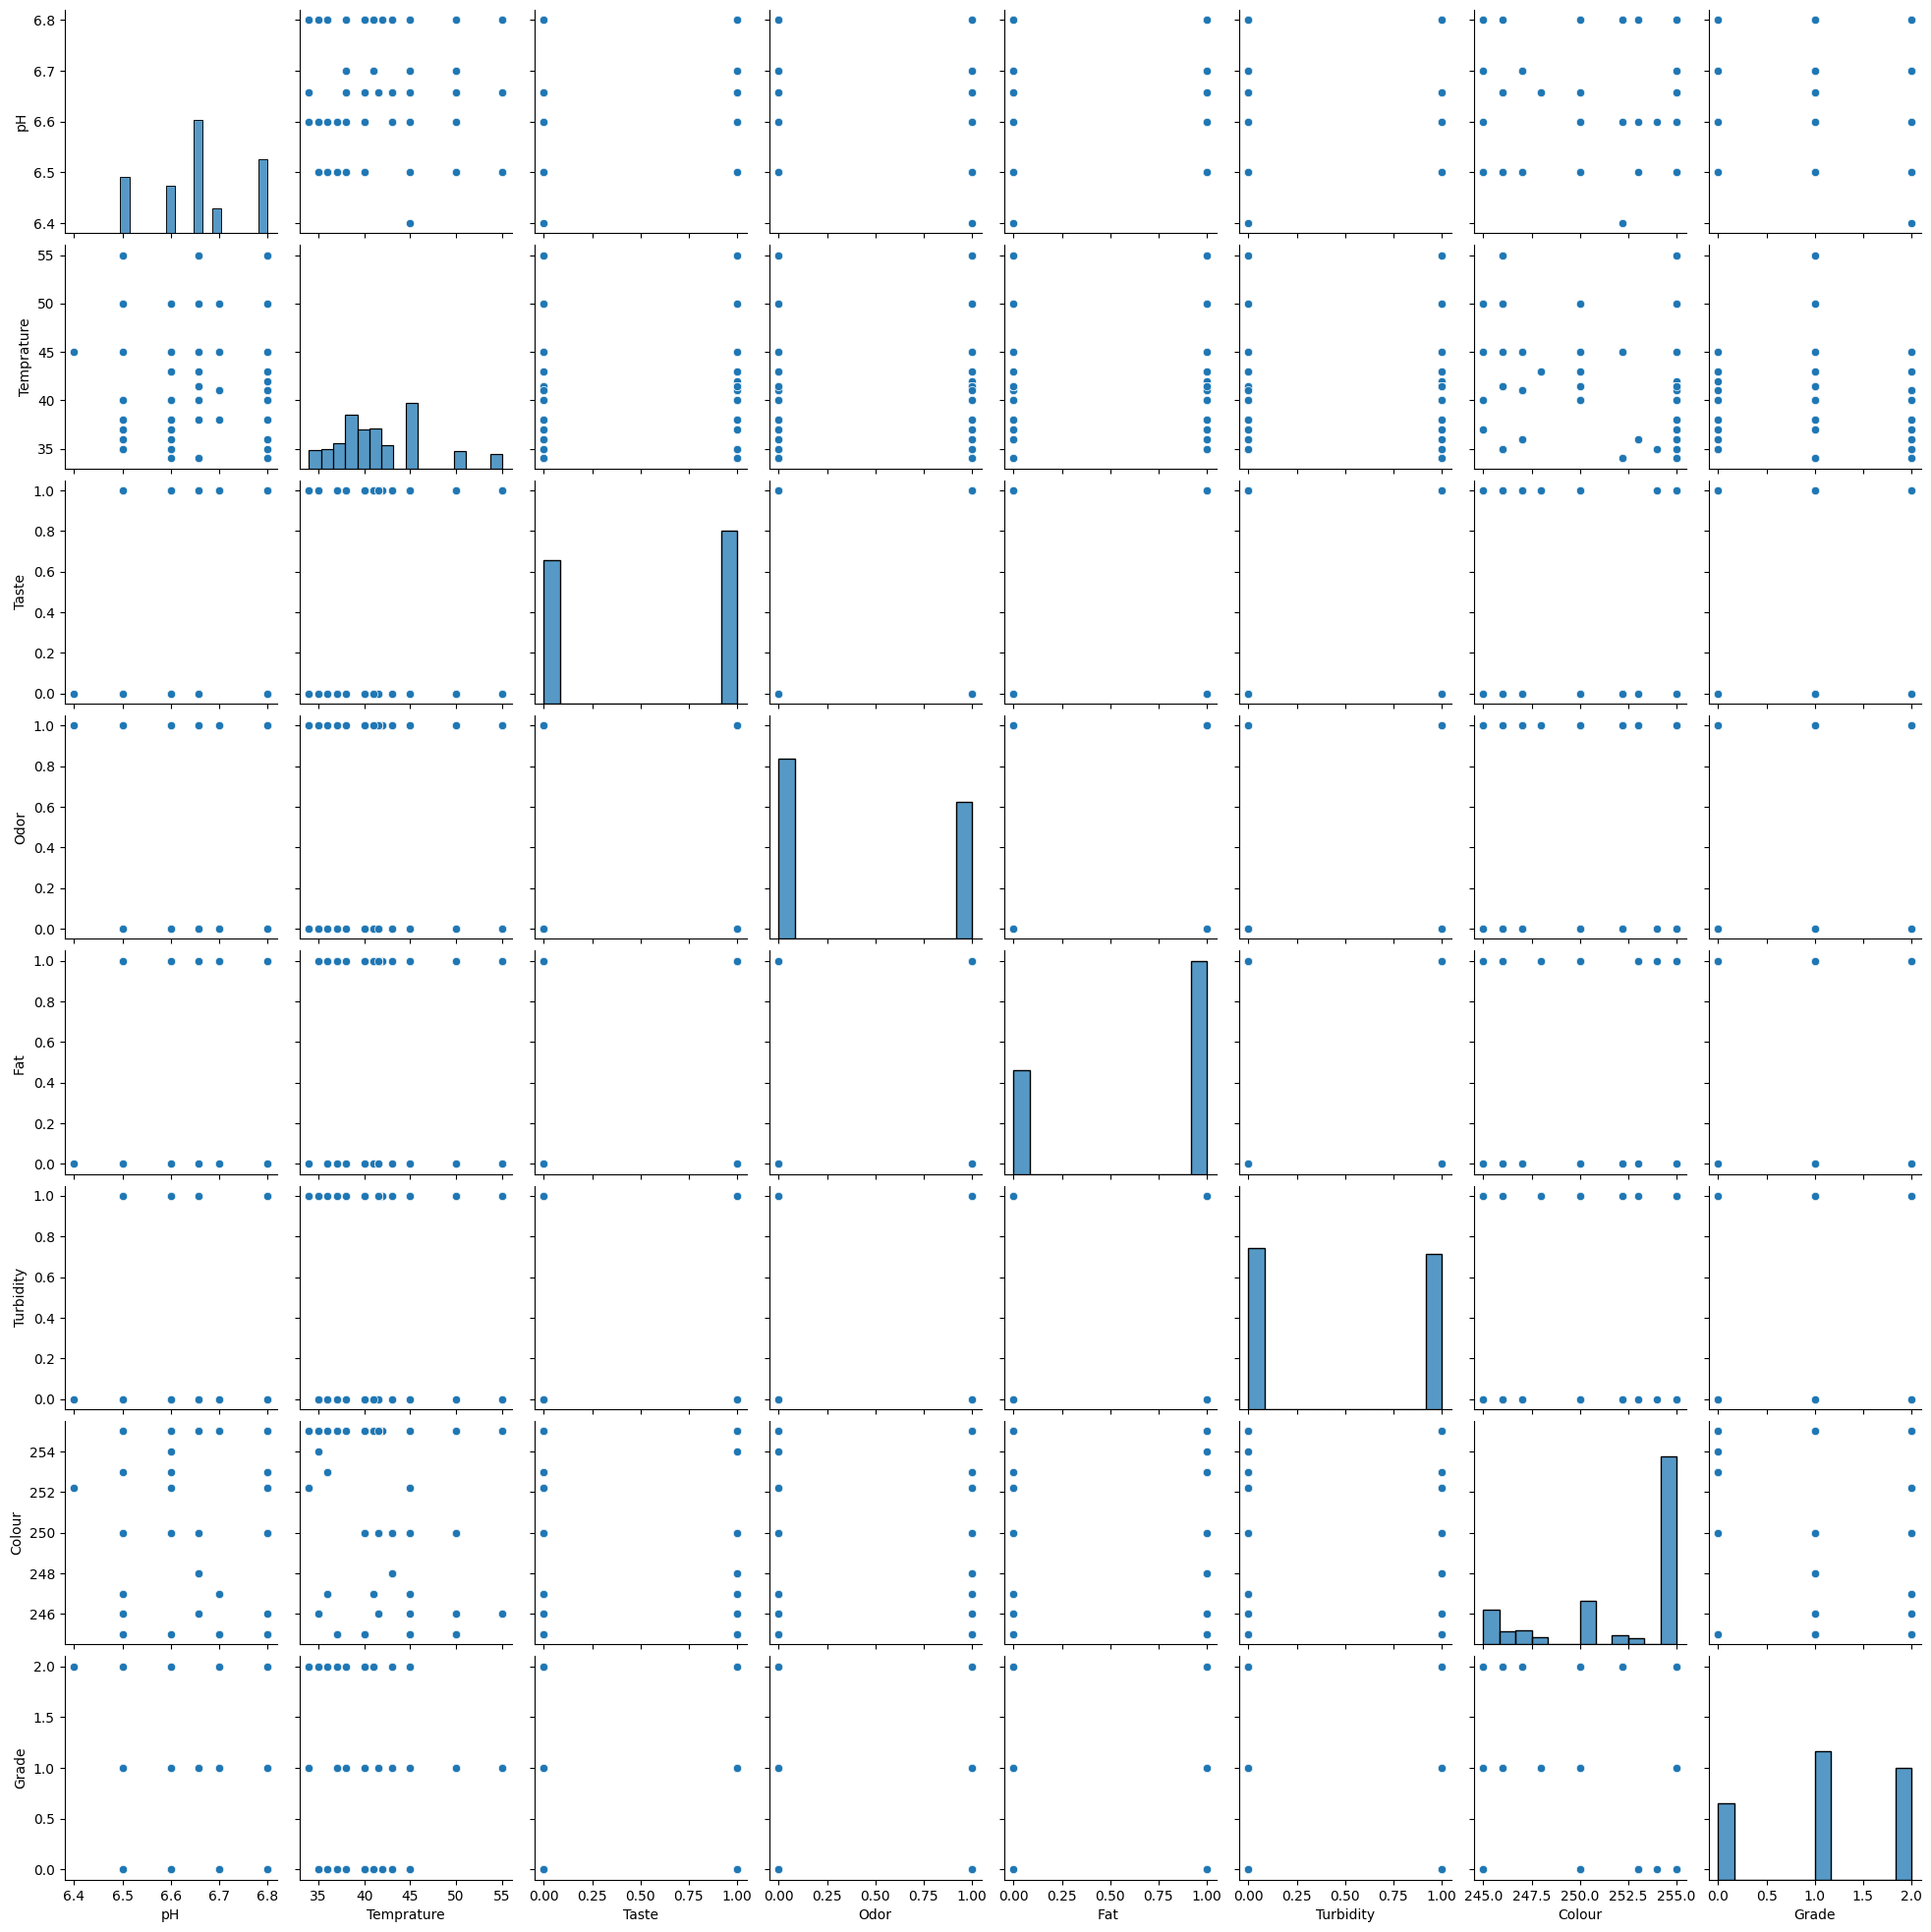

In [65]:
sns.pairplot(data);

### Analyze the data by plottinig kde plot

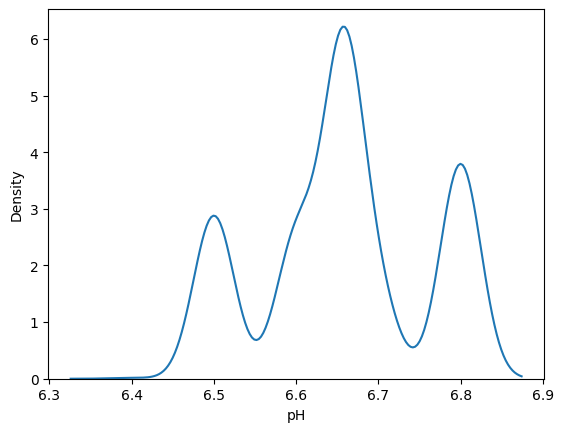

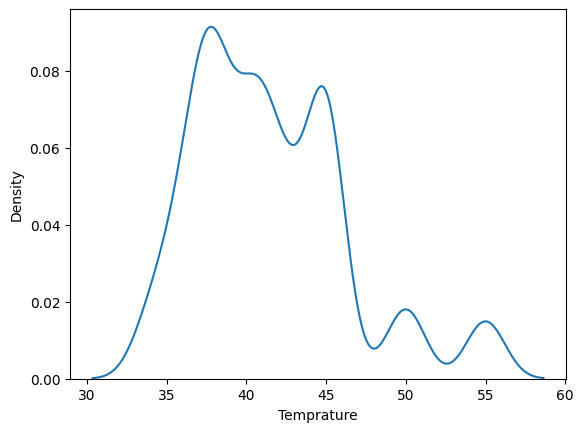

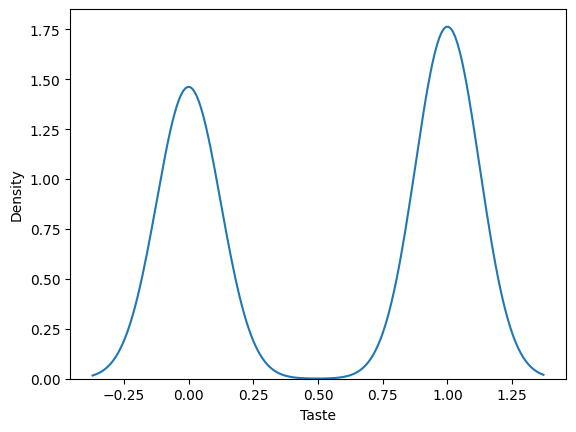

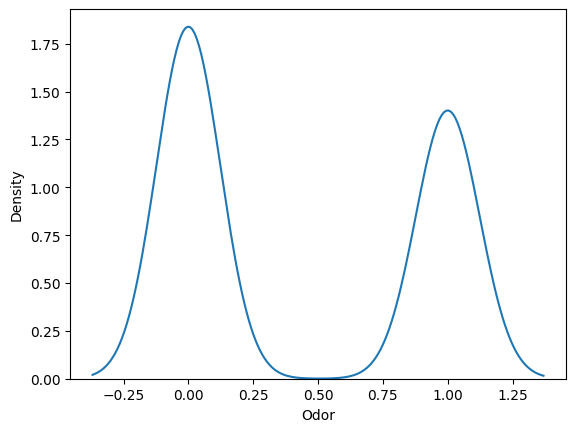

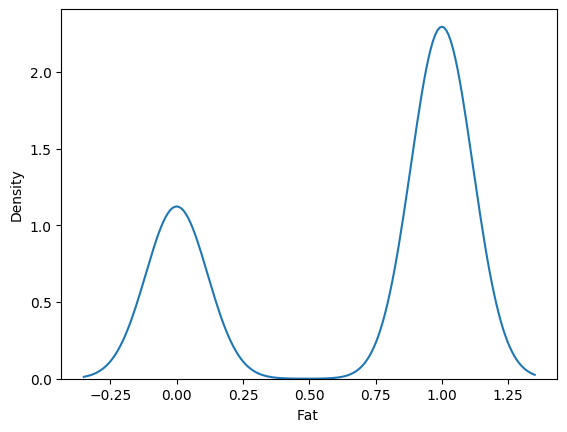

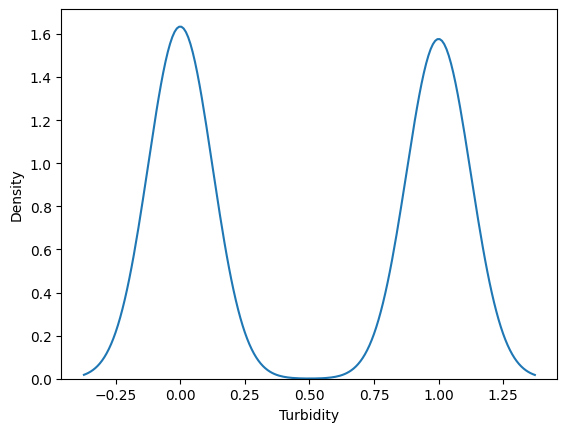

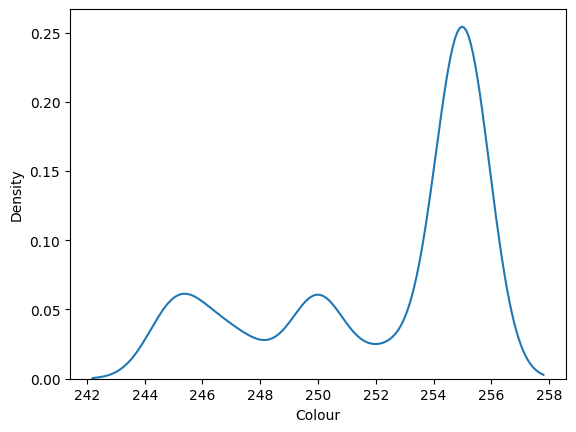

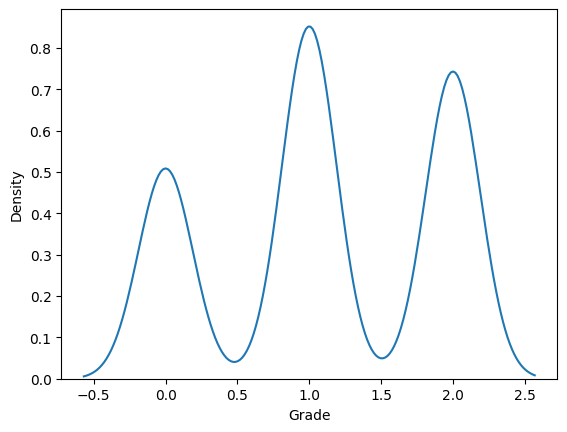

In [66]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.kdeplot( x =data[i])
        plt.show()

<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        Training and Evaluating
    </h2>
</div>

In [67]:

models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

In [68]:
from sklearn.model_selection import train_test_split, cross_val_score
for name, model in models.items():
    scores = cross_val_score(model, X,y, scoring="accuracy",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    print("Mean Score: ",np.mean(scores))
    print("*"*100)

cross validation model : LogisticRegression
Mean Score:  0.688355795148248
****************************************************************************************************
cross validation model : DecisionTreeClassifier
Mean Score:  0.9943396226415094
****************************************************************************************************
cross validation model : RandomForestClassifier
Mean Score:  0.9962264150943396
****************************************************************************************************


### Here we can see both DecisionTreeClassifier and RandomForestClassifier have a mean score of 0.99

**So lets try on both the models**

<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        DecisionTreeClassifier
    </h2>
</div>

Decision tree: A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility.

In [69]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [70]:
y_pred = model.predict(X_test)

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)
    
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  1.0
Accuracy score on Test Data :  0.9764150943396226


**Confusion matrix**

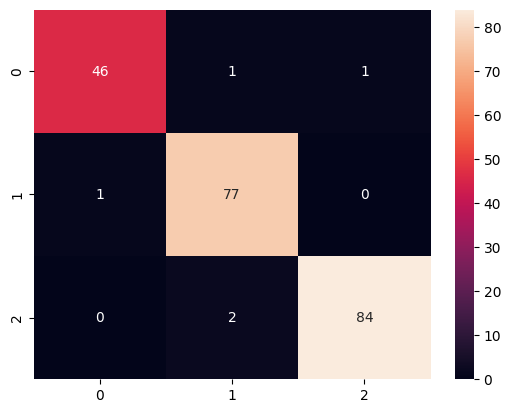

In [71]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')
plt.show()

<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        RandomForestClassifier
    </h2>
</div>

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

In [72]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [73]:
y_pred = model.predict(X_test)

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)
    
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  1.0
Accuracy score on Test Data :  0.9905660377358491


**Here we can see RandomForestClassifier have the best test and training accuracy**


# plot confusion matrix

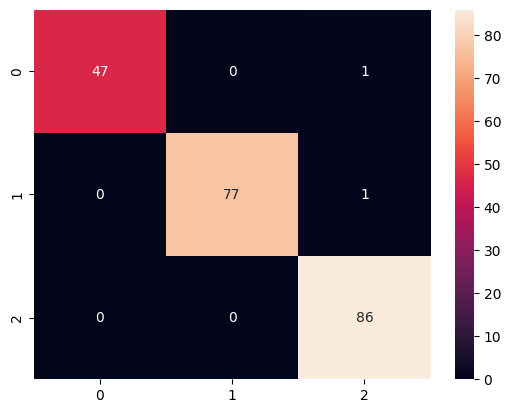

In [74]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')
plt.show()

In [75]:
y = label_binarize(y, classes=[0,1,2])
n_classes = 3

In [76]:
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [77]:
clf = OneVsRestClassifier(LogisticRegression())
y_score = clf.fit(X_train, y_train).decision_function(X_test)

In [78]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

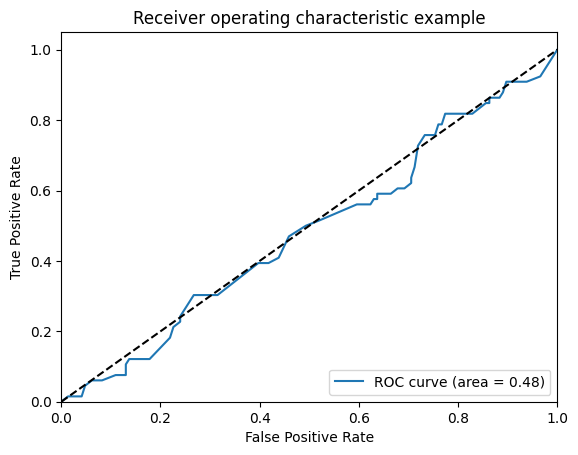

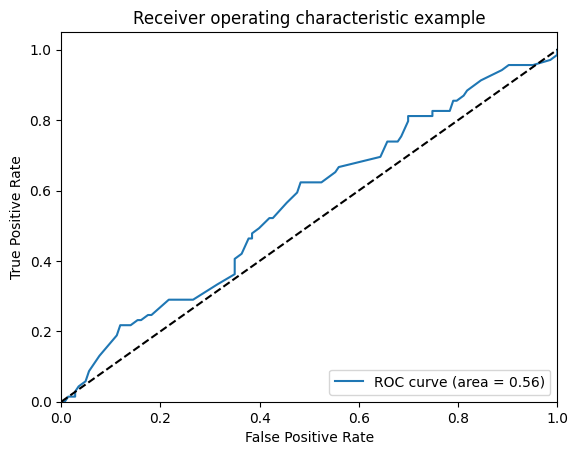

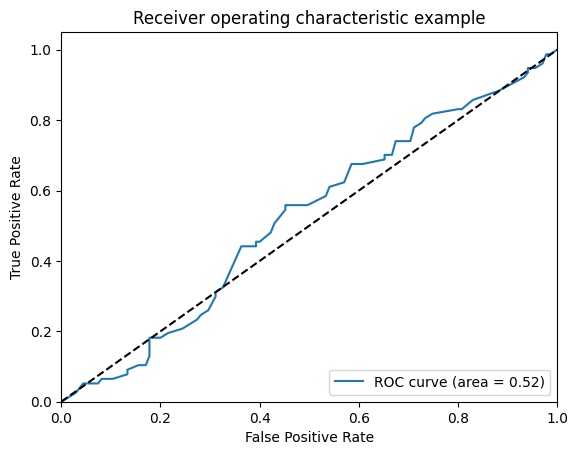

In [79]:
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label = 'ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        CONLUSION
    </h2>
</div>

FINALLY WE CAN PREDICT THE QUALITY OF MILK USING THIS ML MODEL

<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        END
    </h2>
</div>